In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
from PIL import Image
from scipy import signal

## Part A

In [3]:
def dif_of_gauss(x, y, std_c, std_s):
    central_gaussian = (0.5/(np.pi*std_c**2))*np.exp(-(x**2+y**2)/(2*std_c**2))
    surround_gaussian = (0.5/(np.pi*std_s**2))*np.exp(-(x**2+y**2)/(2*std_s**2))
    return central_gaussian - surround_gaussian

In [4]:
def dog_receptive_field(std_c, std_s, width=21):
    receptive_field = np.zeros((width,width))
    min_edge = int(-(width-1)/2)
    max_edge = int((width-1)/2)
    x_ind = 0
    y_ind = 0
    for i in range(min_edge,max_edge,1):
        for j in range(min_edge,max_edge,1):
            receptive_field[x_ind,y_ind] = dif_of_gauss(i,j,std_c,std_s)
            x_ind += 1
        y_ind += 1
        x_ind = 0
    return receptive_field        
    

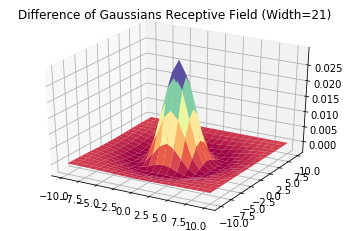

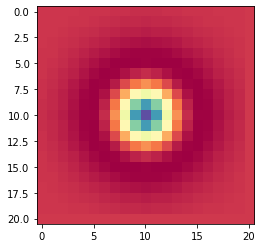

In [5]:
receptive_field = dog_receptive_field(2,4)

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(-10, 10, 21)
Y = X
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, receptive_field, cmap='Spectral', edgecolor='none')
plt.title("Difference of Gaussians Receptive Field (Width=21)")
plt.show(fig)

plt.imshow(receptive_field, cmap='Spectral')
plt.show()

## Part B

(480, 512)


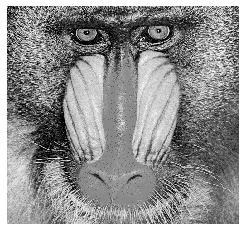

In [6]:
img = Image.open('hw2_image.bmp')
img = np.asarray(img)[:,:,0]
print(img.shape)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

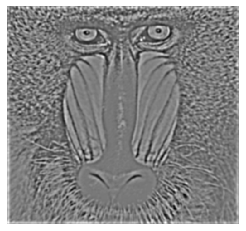

In [15]:
out = signal.convolve2d(img, receptive_field, mode='same')
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()

## Part C

-41.35938403273263 53.14736729317252


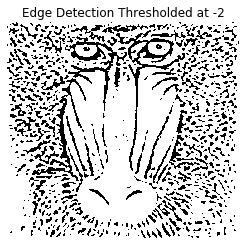

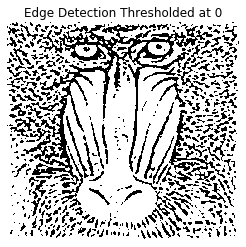

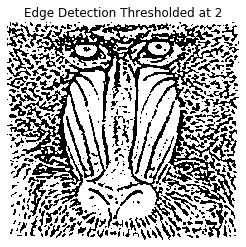

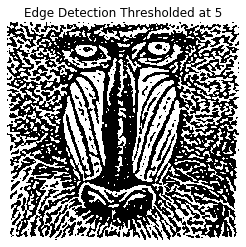

In [47]:
out_thr = np.copy(out)
print(np.min(out_thr),np.max(out_thr))
threshold_value = -2
out_thr[out_thr > threshold_value] = 1
out_thr[out_thr <= threshold_value] = 0
plt.imshow(out_thr, cmap='gray')
plt.title('Edge Detection Thresholded at -2')
plt.axis('off')
plt.show()

out_thr = np.copy(out)
threshold_value = 0
out_thr[out_thr > threshold_value] = 1
out_thr[out_thr <= threshold_value] = 0
plt.imshow(out_thr, cmap='gray')
plt.title('Edge Detection Thresholded at 0')
plt.axis('off')
plt.show()

out_thr = np.copy(out)
threshold_value = 2
out_thr[out_thr <= threshold_value] = 0
out_thr[out_thr > threshold_value] = 1
plt.imshow(out_thr, cmap='gray')
plt.title('Edge Detection Thresholded at 2')
plt.axis('off')
plt.show()

out_thr = np.copy(out)
threshold_value = 5
out_thr[out_thr <= threshold_value] = 0
out_thr[out_thr > threshold_value] = 1
plt.imshow(out_thr, cmap='gray')
plt.title('Edge Detection Thresholded at 5')
plt.axis('off')
plt.show()

## Part D

In [48]:
def gabor(x, theta, sigma_l, sigma_w, lamda, phi):
    k_theta = np.asarray([np.sin(theta), np.cos(theta)])
    k_orth_theta = np.asarray([np.cos(theta), -np.sin(theta)])
    gaussian_part_l = -(np.dot(k_theta, x))**2/(2*sigma_l**2)
    gaussian_part_w = -(np.dot(k_orth_theta, x))**2/(2*sigma_w**2)
    orientation_part = np.cos((2*np.pi*np.dot(k_orth_theta,x)/lamda)+phi)
    return np.exp(gaussian_part_l+gaussian_part_w)*orientation_part

In [49]:
def gabor_receptive_field(sigma_l, sigma_w, theta, lamda, phi, width=21):
    receptive_field = np.zeros((width,width))
    min_edge = int(-(width-1)/2)
    max_edge = int((width-1)/2)
    x_ind = 0
    y_ind = 0
    for i in range(min_edge,max_edge,1):
        for j in range(min_edge,max_edge,1):
            receptive_field[x_ind,y_ind] = gabor(np.asarray([i,j]),theta,sigma_l,sigma_w,lamda, phi)
            x_ind += 1
        y_ind += 1
        x_ind = 0
    return receptive_field        
    

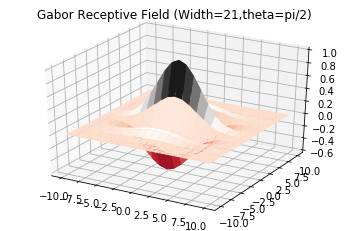

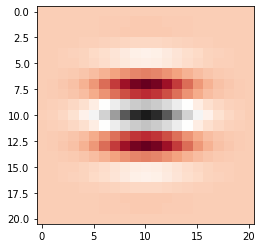

In [50]:
theta = np.pi/2
sigma_l = sigma_w = 3
lamda = 6
phi = 0
gabor_rec_field = gabor_receptive_field(sigma_l, sigma_w, theta, lamda, phi)

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.linspace(-10, 10, 21)
Y = X
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, gabor_rec_field, cmap='RdGy', edgecolor='none')
plt.title("Gabor Receptive Field (Width=21,theta=pi/2)")
plt.show(fig)

plt.imshow(gabor_rec_field, cmap='RdGy')
plt.show()

## Part E

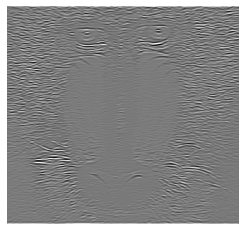

In [53]:
out = signal.convolve2d(img, gabor_rec_field, mode='same')
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()

-1781.1566954134494 2068.4930765191057


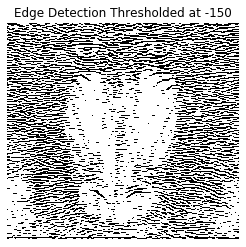

In [66]:
out_thr = np.copy(out)
print(np.min(out_thr),np.max(out_thr))
threshold_value = 0
out_thr[out_thr > threshold_value] = 1
out_thr[out_thr <= threshold_value] = 0
plt.imshow(out_thr, cmap='gray')
plt.title('Edge Detection Thresholded at -150')
plt.axis('off')
plt.show()

## Part F

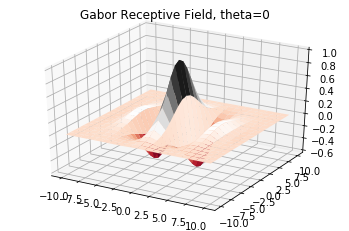

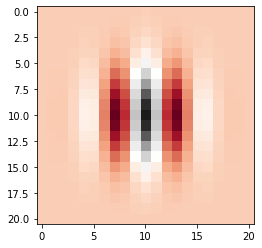

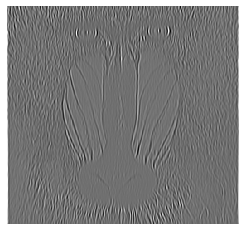

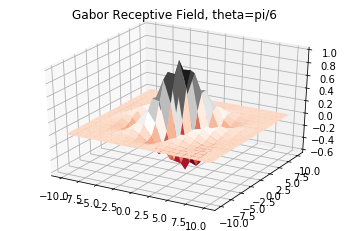

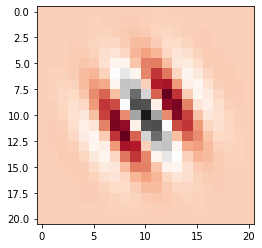

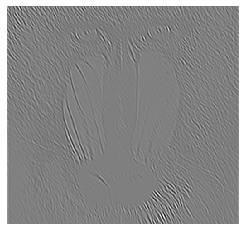

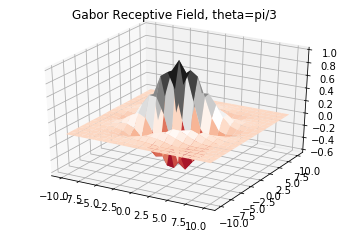

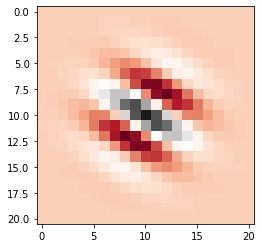

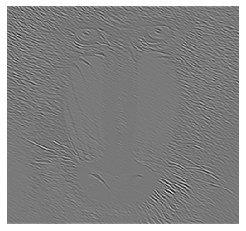

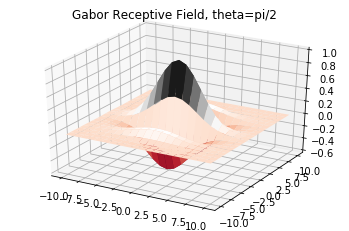

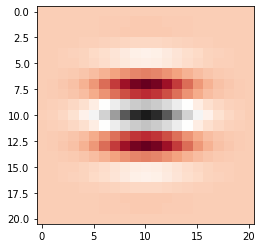

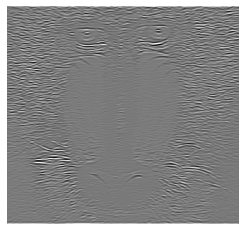

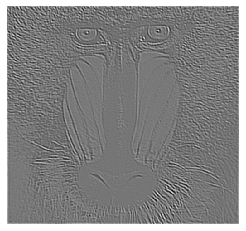

In [79]:
theta_list = [0, np.pi/6, np.pi/3, np.pi/2]
theta_list_str = ['0', 'pi/6', 'pi/3', 'pi/2']
sigma_l = sigma_w = 3
lamda = 6
phi = 0

ind = 0
out_f = np.zeros(out.shape)
for el in theta_list:
    gabor_temp = gabor_receptive_field(sigma_l, sigma_w, el, lamda, phi)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.linspace(-10, 10, 21)
    Y = X
    X, Y = np.meshgrid(X, Y)
    ax.plot_surface(X, Y, gabor_temp, cmap='RdGy', edgecolor='none')
    plt.title("Gabor Receptive Field, theta=%s" % theta_list_str[ind])
    ind += 1
    plt.show(fig)

    plt.imshow(gabor_temp, cmap='RdGy')
    plt.show()
    
    out_temp = signal.convolve2d(img, gabor_temp, mode='same')
    plt.imshow(out_temp, cmap='gray')
    plt.axis('off')
    plt.show()
    out_f += out_temp
    
plt.imshow(out_f, cmap='gray')
plt.axis('off')
plt.show()

5130.59887097496
-3978.9526271000877


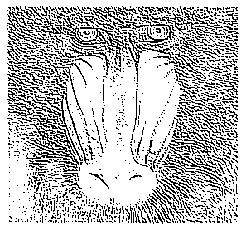

In [83]:
out_ff = np.copy(out_f)
print(np.max(out_ff))
print(np.min(out_ff))
thr_val = 0
out_ff[out_ff <= thr_val] = 0
out_ff[out_ff > thr_val] = 1
plt.imshow(out_ff, cmap='gray')
plt.axis('off')
plt.show()